In [1]:
%matplotlib widget

from PyNEC import nec_context
from nec2_antenna_simulator.setters import set_geometry, set_loads, set_frequency, set_ground, set_radiation_pattern, run
from nec2_antenna_simulator.getters import get_impedance, get_radiation_pattern
from nec2_antenna_simulator.metrics import reflection_coefficient, vswr
from nec2_antenna_simulator.viz import plot_nec_model_3d, plot_radiation_patterns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [2]:
WIRES = [
    (100, -2.5, 0, 10, 2.5, 0, 10, 0.002, 1.0, 1.0),
]

EXCITATIONS = [
    (0, 1, 50, 0, 1.0, 0, 0, 0, 0, 0)
]

LOADS = [

]

ground_conductivity = 0.002
ground_dielectric = 10
GROUND = (
    0, # Ground type
    0, # Number of radial wires
    13, # Relative permitivity (eps r)
    0.005, # Conductivity (S/m)
    0, 
    0, 
    0, 
    0
)

# FREQUENCY = (
#     0, # 0 linear, 1 logarithmic
#     1, # Number of points
#     28.050, # Start frequency (MHz)
#     0, # Step (MHz) or multiplier
# )

FREQUENCY = (
    0, # 0 linear, 1 logarithmic
    5, # Number of points
    28.050, # Start frequency (MHz)
    0.1, # Step (MHz) or multiplier
)

RAD_PATTERN = (
    0,  # calc_mode 
    91, # n_theta
    361, # n_phi
    0, # output_format
    0, # normalization
    0, # D 
    0, # A
    0.0, # theta0
    0.0, # phi0
    1.0, # delta_theta
    1.0, # delta_phi
    0.0, # radial_distance
    0 # gain_norm
)

In [3]:
nec = nec_context()

nec = set_geometry(nec=nec, wires=WIRES, excitations=EXCITATIONS)
nec = set_loads(nec=nec, loads=LOADS)
nec = set_frequency(nec=nec, frequency=FREQUENCY)
nec = set_ground(nec=nec, ground=GROUND)
nec = set_radiation_pattern(nec=nec, rad_pattern=RAD_PATTERN)

nec = run(nec=nec)

z = np.array([get_impedance(nec=nec, index=index) for index in range(FREQUENCY[1])]).reshape(-1)
gamma = reflection_coefficient(z=z, z0=50)
roe = vswr(z=z, z0=50)
print(f"Z = {np.round(z, 1)}, Γ = {gamma}, VSWR = {roe}")

Z = [68.3-38.8j 68.9-34.8j 69.4-30.7j 70. -26.7j 70.6-22.6j], Γ = [0.34473435 0.31945996 0.29478427 0.27114555 0.24910383], VSWR = [2.05219721 1.93884253 1.83601162 1.7440321  1.66348408]


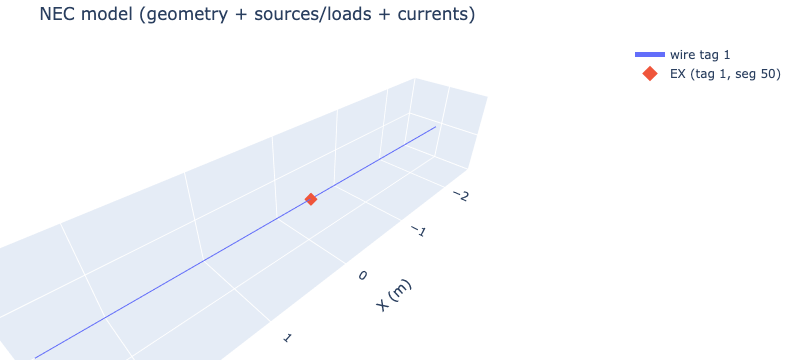

In [4]:
plot_nec_model_3d(wires=WIRES, excitations=EXCITATIONS, loads=LOADS, nec=nec)

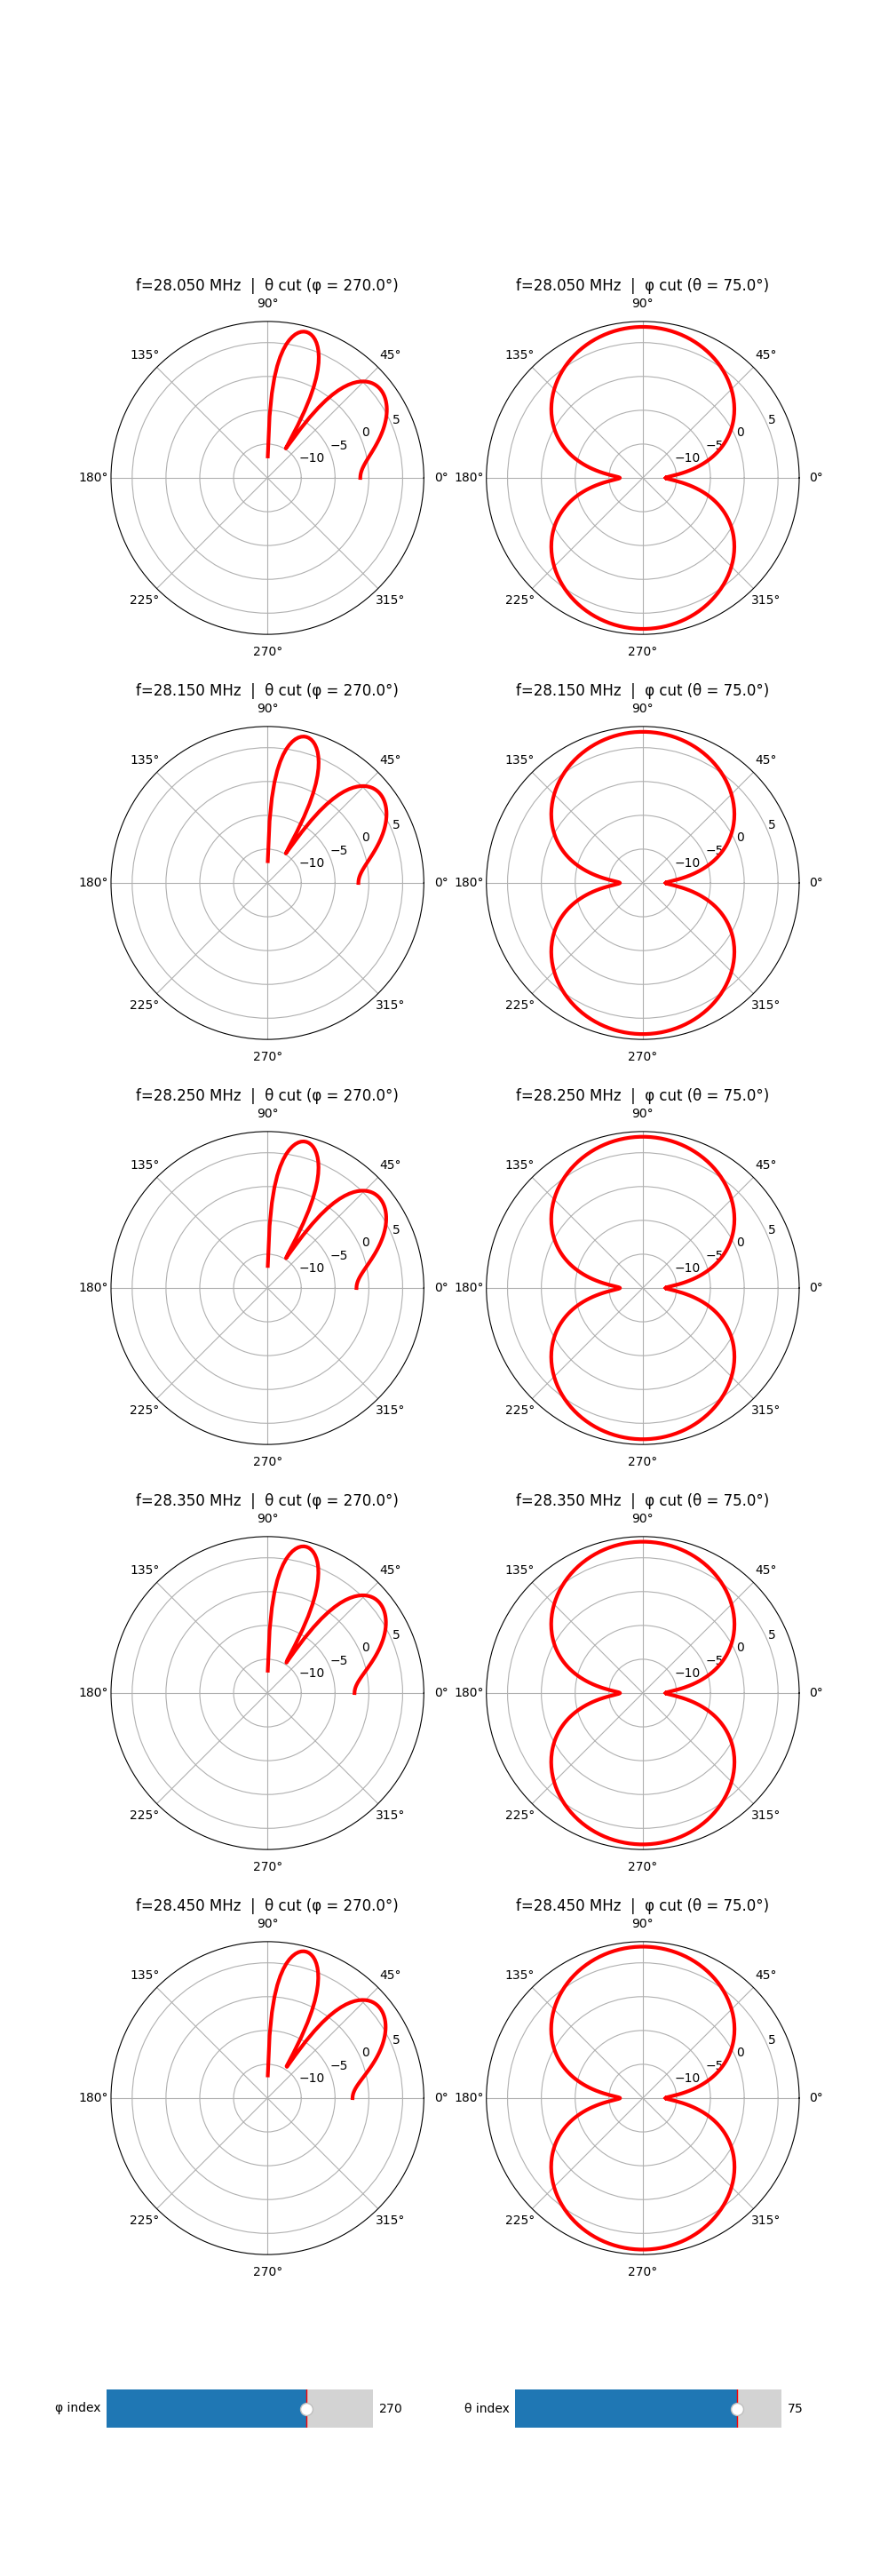

In [5]:
fig, ax, _ = plot_radiation_patterns(nec=nec, freq_indices=None, figsize_per_row=(10, 5.8))

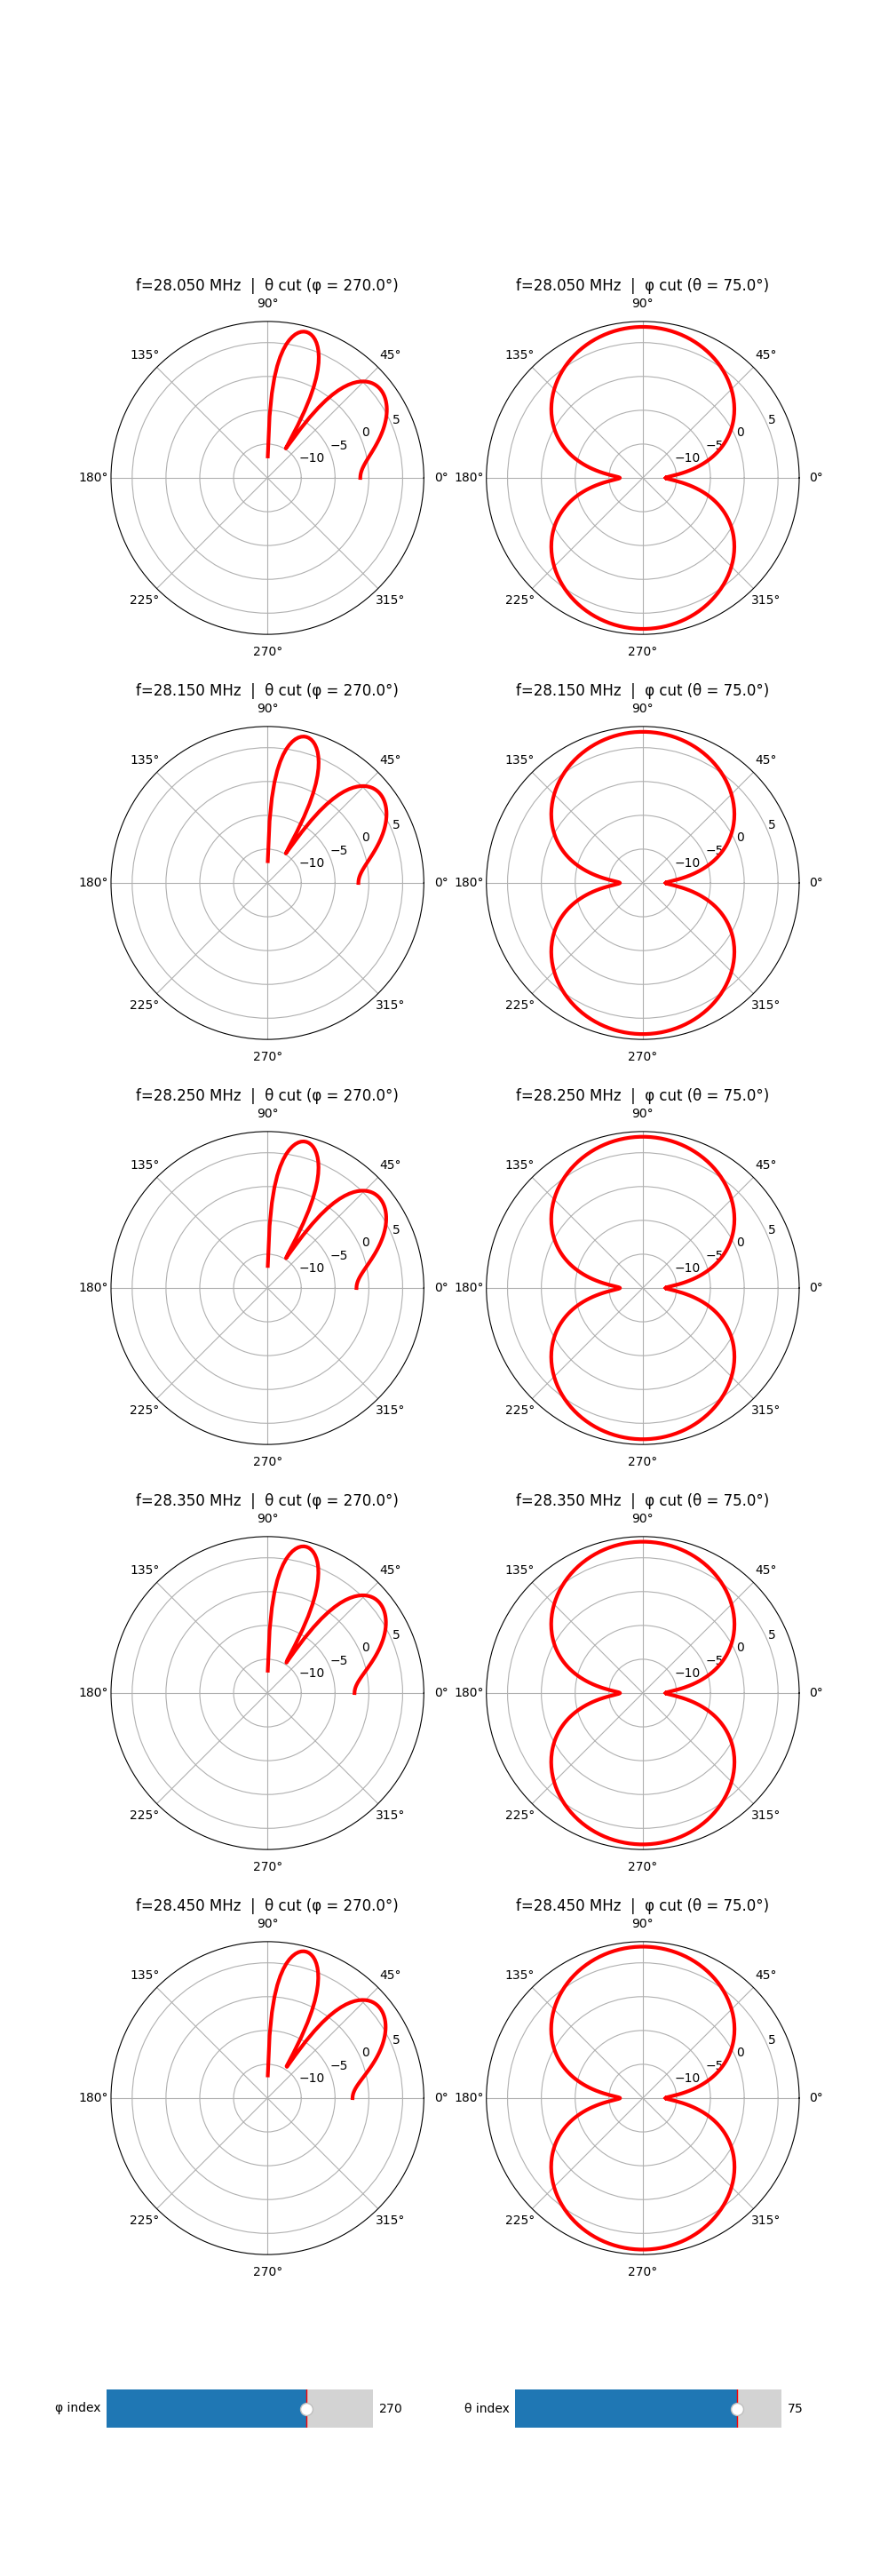

In [6]:
fig.show()